<a href="https://colab.research.google.com/github/codeplinth/pytorchbootcamp/blob/master/PyTorch_26_NeuralNetwork_MultiClass_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torch import nn,optim
from torch.utils.data import Dataset,DataLoader
import torchvision
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# Define a function to plot accuracy and loss
def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

In [24]:
# Define a function to display data
def show_data(data_sample,y):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap='gray')
    plt.title('y = '+str(y))
    plt.show()

In [4]:
#create training dataset and print it
train_dataset = datasets.MNIST(root='../mnist_data',download=True,train = True,transform=transforms.ToTensor())
print(train_dataset)

Extracting ../mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ../mnist_data/MNIST/raw


Extracting ../mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ../mnist_data/MNIST/raw


Extracting ../mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../mnist_data/MNIST/raw




Extracting ../mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../mnist_data/MNIST/raw
Processing...
Done!
Dataset MNIST
    Number of datapoints: 60000
    Root location: ../mnist_data
    Split: Train
    StandardTransform
Transform: ToTensor()


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
#create validation dataset and print it
validation_dataset = datasets.MNIST(root = '../mnist_data',download = True,train=False , transform = transforms.ToTensor())
print(validation_dataset)

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../mnist_data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [7]:
#define the neural network
class MNIST_Net(nn.Module):
  def __init__(self,D_in,H,D_out):
    super(MNIST_Net,self).__init__()
    self.l1 = nn.Linear(D_in,H)
    self.l2 = nn.Linear(H,D_out)
    self.sigmoid = nn.Sigmoid()
  def forward(self,x):
    out1 = self.sigmoid(self.l1(x))
    y_pred = self.l2(out1)
    return y_pred

In [10]:
model = MNIST_Net(1*28*28,100,10)
optimizer = optim.SGD(model.parameters(),lr = 0.01)
criterion = nn.CrossEntropyLoss()
trainloader = DataLoader(dataset = train_dataset,batch_size = 2000,shuffle=True)
validationloader  = DataLoader(dataset = validation_dataset,batch_size = 5000,shuffle=True)

In [18]:
def train_model(EPOCHS):
  metrics = {'training_loss' : [] , 'validation_accuracy' : []}
  for epoch in range(EPOCHS):
    for i,(x,y) in enumerate(trainloader):
      z = model(x.view(-1,1*28*28))
      loss = criterion(z,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      metrics['training_loss'].append(loss.item())
    correct = 0
    for x,y in validationloader:
      z = model(x.view(-1,1*28*28))
      _,y_pred = torch.max(z,1)
      correct += (y_pred == y).sum().item()
    accuracy = 100 * (correct / len(validation_dataset)) 
    metrics['validation_accuracy'].append(accuracy)
  return metrics


In [19]:
metrics = train_model(30)

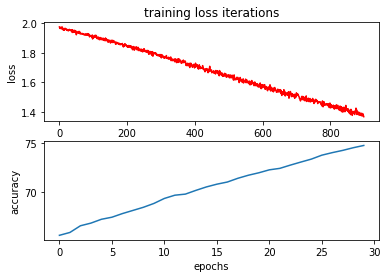

In [20]:
plot_accuracy_loss(metrics)

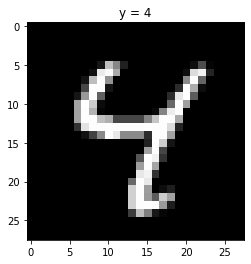

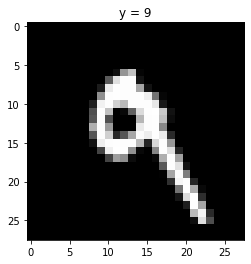

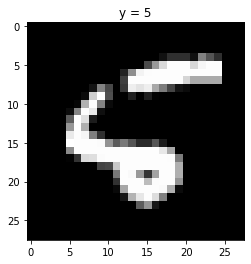

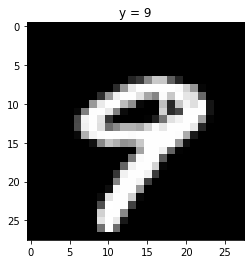

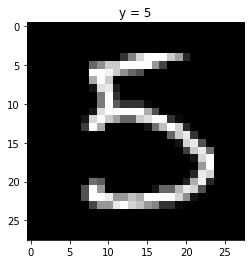

In [26]:
#plot first 5 misclassfied samples
count = 0
for x,y in validation_dataset:
  z = model(x.view(-1,1*28*28))
  _,y_pred = torch.max(z,1)
  if (y_pred != y):
    show_data(x,y)
    count += 1
  if ( count>= 5):
    break